# Task: Measures of central tendency, measures of spread

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import math

In [27]:
df=pd.read_csv(r"C:\Users\ano_k\Entri class\house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [29]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [30]:
df.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


In [31]:
df.drop(columns='size',inplace=True)
df

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615
2,Uttarahalli,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245
4,Kothanur,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...
13195,Whitefield,3453.0,4.0,231.00,5,6689
13196,other,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4689.0,4.0,488.00,4,10407


# Mean

In [32]:
Mean=df["price_per_sqft"].mean()
print("Mean=",Mean)

Mean= 7920.336742424242


In [33]:
df["price_per_sqft"].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

# Percentile

In [34]:
Q1,Q2,Q3=df.price_per_sqft.quantile([0.25,0.50,0.75]) 
print("25 percentile =",Q1)
print("50 percentile=",Q2)
print("75 percentile=",Q3)

25 percentile = 4267.0
50 percentile= 5438.0
75 percentile= 7317.0


# IQR(Inter quartile range method)

In [35]:
IQR=Q3-Q1
print("IQR=",IQR)

IQR= 3050.0


In [124]:
lower_whisker=Q1-1.5*IQR
upper_whisker=Q3+1.5*IQR 
print("Lower whisker =",lower_whisker,"Upper whisker =",upper_whisker)

Lower whisker = -308.0 Upper whisker = 11892.0


In [125]:
df[(df["price_per_sqft"]<lower_whisker)|(df["price_per_sqft"]>upper_whisker)]

,location,total_sqft,bath,price,bhk,price_per_sqft,log_of_price_per_sqft,zscore
7,Rajaji Nagar,3300.0,4.0,600.0,4,18181,2.283217,2.255050
9,other,1020.0,6.0,370.0,6,36274,2.351269,3.494570
22,Thanisandra,2800.0,5.0,380.0,4,13571,2.252950,1.703741
45,HSR Layout,600.0,9.0,200.0,8,33333,2.343183,3.347289
48,KR Puram,800.0,1.0,130.0,2,16250,2.271704,2.045340
...,...,...,...,...,...,...,...,...
13142,other,1140.0,1.0,185.0,2,16228,2.271564,2.042795
13157,other,1400.0,7.0,218.0,7,15571,2.267293,1.964986
13185,Hulimavu,500.0,1.0,220.0,1,44000,2.369493,3.826506
13186,other,1200.0,5.0,325.0,4,27083,2.323044,2.980471


IQR is a mathematical way to find outliers of the dataset.Data that is less than the lower limit or more than the upper limit falls under outliers.In this dataset 1265 rows are in outliers

In [ ]:
#Data without outliers
df[(df["price_per_sqft"]>lowerlimit)& (df["price_per_sqft"]<upperlimit)]

# Normal distribution

In [ ]:
df.describe()

In [ ]:
df["price_per_sqft"].describe().round(2)

Using the describe function we can conclude that price_per_sqft is not normally distributed as the mean and median are not close. For a positively skewed frequency distribution, the mean is always greater than the median and for a negatively skewed frequency distribution, the mean is always less than the median. Here the mean(7920.34) is greater than the median (50%-5438.00).So it is positively skewed.

In [80]:
skewness=df["price_per_sqft"].skew()
kurt=df["price_per_sqft"].kurtosis()
print("skewness:",skewness)
print("kurtosis:",kurt)

skewness: 108.28105529705168
kurtosis: 12095.21502832288


We can find out whether it is positive or negative using the skew function. The return value of skew is a positive number greater than 1. That means the data is highly skewed.

In [81]:
df["log_of_price_per_sqft"]=np.log1p(df["price_per_sqft"])
log_skew=df["log_of_price_per_sqft"].skew()
print("log skewness:",log_skew)
log_kurt=df["log_of_price_per_sqft"].kurtosis()
print("log kurtosis",log_kurt)

log skewness: 1.4004850530059296
log kurtosis 9.206942162860814


C:\Users\ano_k\AppData\Local\Temp\ipykernel_14164\1487816761.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["log_of_price_per_sqft"],color='r')


<Axes: xlabel='log_of_price_per_sqft', ylabel='Density'>

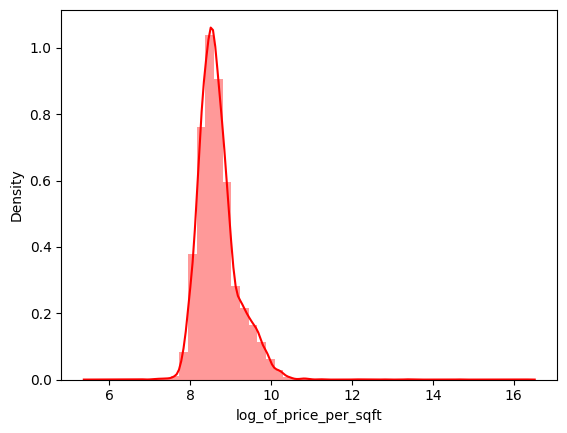

In [82]:
sns.distplot(df["log_of_price_per_sqft"],color='r')

In [83]:
df["log_of_price_per_sqft"]=np.log(df["log_of_price_per_sqft"])
logdata
skewness=df["log_of_price_per_sqft"].skew()
print("skewness:",skewness)
kurt1=df["log_of_price_per_sqft"].kurtosis()
print("kurtosis:",kurt1)

skewness: 0.8547548468076371
kurtosis: 4.306336506008032


<Axes: xlabel='log_of_price_per_sqft', ylabel='Count'>

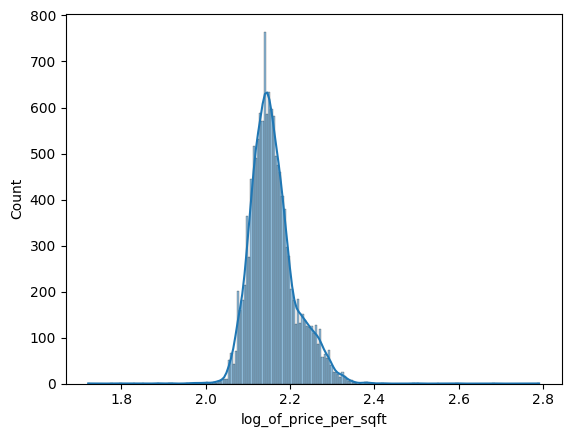

In [84]:
sns.histplot(data=df,x=df["log_of_price_per_sqft"],kde=True)

# Z-Score

In [85]:
mean=df["log_of_price_per_sqft"].mean()
print("mean:",mean)
std=df["log_of_price_per_sqft"].std()
print("standard deviation",std)

mean: 2.159411936476946
standard deviation 0.05490147604086038


In [91]:
df["zscore"]=(df["log_of_price_per_sqft"]-mean)/std
df

,location,total_sqft,bath,price,bhk,price_per_sqft,log_of_price_per_sqft,zscore
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699,2.106094,-0.971153
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615,2.132660,-0.487264
2,Uttarahalli,1440.0,2.0,62.00,3,4305,2.124387,-0.637964
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245,2.167875,0.154159
4,Kothanur,1200.0,2.0,51.00,2,4250,2.122849,-0.665968
...,...,...,...,...,...,...,...,...
13195,Whitefield,3453.0,4.0,231.00,5,6689,2.175702,0.296720
13196,other,3600.0,5.0,400.00,4,11111,2.231710,1.316866
13197,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258,2.147999,-0.207883
13198,Padmanabhanagar,4689.0,4.0,488.00,4,10407,2.224659,1.188443


We removed outliers using the z-score. Any Z-score greater than +3 or less than -3 is considered an outlier

In [92]:
df1=df[(df.zscore>-3)&(df.zscore<3)]
df1

,location,total_sqft,bath,price,bhk,price_per_sqft,log_of_price_per_sqft,zscore
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699,2.106094,-0.971153
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615,2.132660,-0.487264
2,Uttarahalli,1440.0,2.0,62.00,3,4305,2.124387,-0.637964
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245,2.167875,0.154159
4,Kothanur,1200.0,2.0,51.00,2,4250,2.122849,-0.665968
...,...,...,...,...,...,...,...,...
13195,Whitefield,3453.0,4.0,231.00,5,6689,2.175702,0.296720
13196,other,3600.0,5.0,400.00,4,11111,2.231710,1.316866
13197,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258,2.147999,-0.207883
13198,Padmanabhanagar,4689.0,4.0,488.00,4,10407,2.224659,1.188443


# Box plot

Text(0.5, 1.0, 'Total_sqft')

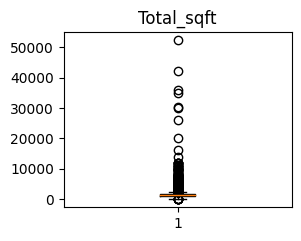

In [102]:
plt.figure(figsize=(10,5))
plt.subplot(2, 3, 1)
plt.boxplot(df.total_sqft)
plt.title("Total_sqft")

Text(0.5, 1.0, 'Price_per_sqft')

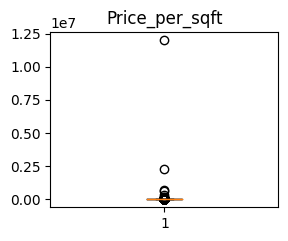

In [103]:
plt.figure(figsize=(10,5))
plt.subplot(2,3,2)
plt.boxplot(df.price_per_sqft)
plt.title("Price_per_sqft")

Text(0.5, 1.0, 'Bath')

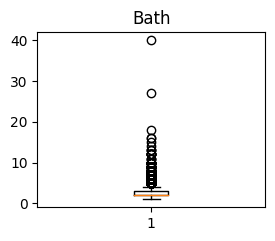

In [104]:
plt.figure(figsize=(10,5))
plt.subplot(2,3,3)
plt.boxplot(df.bath)
plt.title("Bath")

Text(0.5, 1.0, 'BHK')

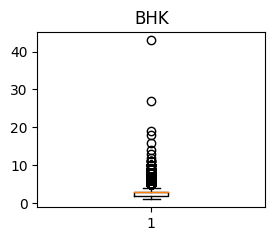

In [105]:
plt.figure(figsize=(10,5))
plt.subplot(2,3,4)
plt.boxplot(df.bhk)
plt.title("BHK")

Text(0.5, 1.0, 'Price')

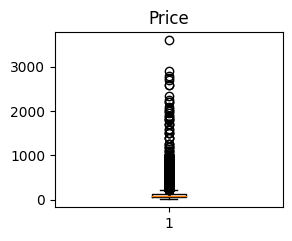

In [106]:
plt.figure(figsize=(10,5))
plt.subplot(2,3,5)
plt.boxplot(df.price)
plt.title("Price")

# Heatmap

In [112]:
df2=df.drop(["location","log_of_price_per_sqft","zscore"],axis=1)
df2

,total_sqft,bath,price,bhk,price_per_sqft
0,1056.0,2.0,39.07,2,3699
1,2600.0,5.0,120.00,4,4615
2,1440.0,2.0,62.00,3,4305
3,1521.0,3.0,95.00,3,6245
4,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...
13195,3453.0,4.0,231.00,5,6689
13196,3600.0,5.0,400.00,4,11111
13197,1141.0,2.0,60.00,2,5258
13198,4689.0,4.0,488.00,4,10407


In [114]:
corr1=df2.corr()
corr1

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.392743,0.574330,0.346013,-0.008267
bath,0.392743,1.000000,0.455998,0.897951,0.030883
price,0.574330,0.455998,1.000000,0.396883,0.028387
bhk,0.346013,0.897951,0.396883,1.000000,0.030955
price_per_sqft,-0.008267,0.030883,0.028387,0.030955,1.000000


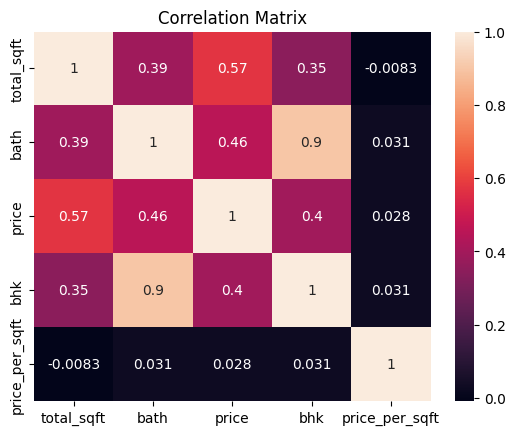

In [116]:
sns.heatmap(corr1,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Pair Plot

C:\Users\ano_k\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


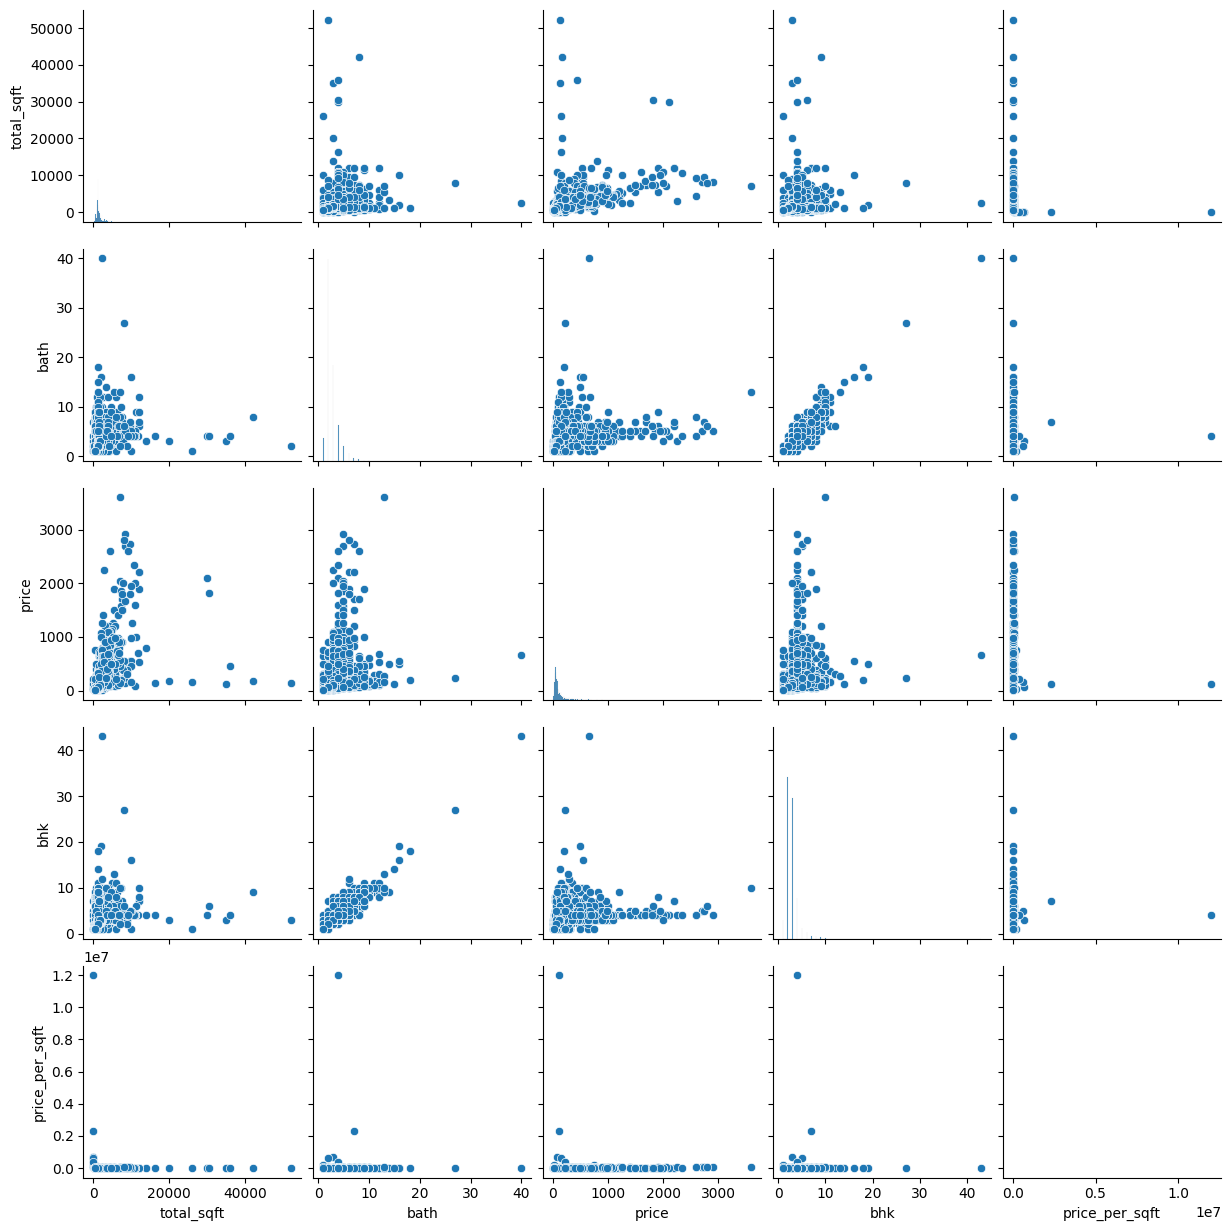

In [122]:
sns.pairplot(df2)
plt.show()